### 1. ¿Superhéroe o Villano? 
### Problema: Clasifica si un nuevo personaje es superhéroe o villano usando CART (Gini) e ID3 (Entropía). 
#### Preguntas: ¿Cuál es el mejor atributo para la raíz? ¿Cómo cambia el árbol si añades a "Wonder Woman" (Sí, Sí, Alta, Superhéroe)?

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data = {
    "Nombre":['Batman','Joker','Superman','Lex Luthor'],
    "UsaCapa": ['si','no','si','no'],
    "TienePoderes":['no','no','si','no'],
    "Inteligencia":['alta','alta','media','alta'],
    "Clase":['superheroe','villano','superheroe','villano']
}
df=pd.DataFrame(data)
df.head()

,Nombre,UsaCapa,TienePoderes,Inteligencia,Clase
0,Batman,si,no,alta,superheroe
1,Joker,no,no,alta,villano
2,Superman,si,si,media,superheroe
3,Lex Luthor,no,no,alta,villano


In [2]:
df['UsaCapa'] = df['UsaCapa'].replace({'si': 0, 'no': 1}).infer_objects(copy=False)
df['TienePoderes'] = df['TienePoderes'].replace({'si': 0, 'no': 1}).infer_objects(copy=False)
df['Inteligencia'] = df['Inteligencia'].replace({'alta': 0, 'media': 1}).infer_objects(copy=False)
df['Clase'] = df['Clase'].replace({'superheroe': 0, 'villano': 1}).infer_objects(copy=False)

df.head()

C:\Users\sebas\AppData\Local\Temp\ipykernel_15992\346824845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['UsaCapa'] = df['UsaCapa'].replace({'si': 0, 'no': 1}).infer_objects(copy=False)
C:\Users\sebas\AppData\Local\Temp\ipykernel_15992\346824845.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TienePoderes'] = df['TienePoderes'].replace({'si': 0, 'no': 1}).infer_objects(copy=False)
C:\Users\sebas\AppData\Local\Temp\ipykernel_15992\346824845.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and w

,Nombre,UsaCapa,TienePoderes,Inteligencia,Clase
0,Batman,0,1,0,0
1,Joker,1,1,0,1
2,Superman,0,0,1,0
3,Lex Luthor,1,1,0,1


In [3]:
X = df.drop(["Nombre","Clase"], axis=1)
y = df["Clase"]

In [4]:
#Árbol con gini
arbol_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
arbol_gini.fit(X,y)
#Arbol con entropia
arbol_entropia = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
arbol_entropia.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

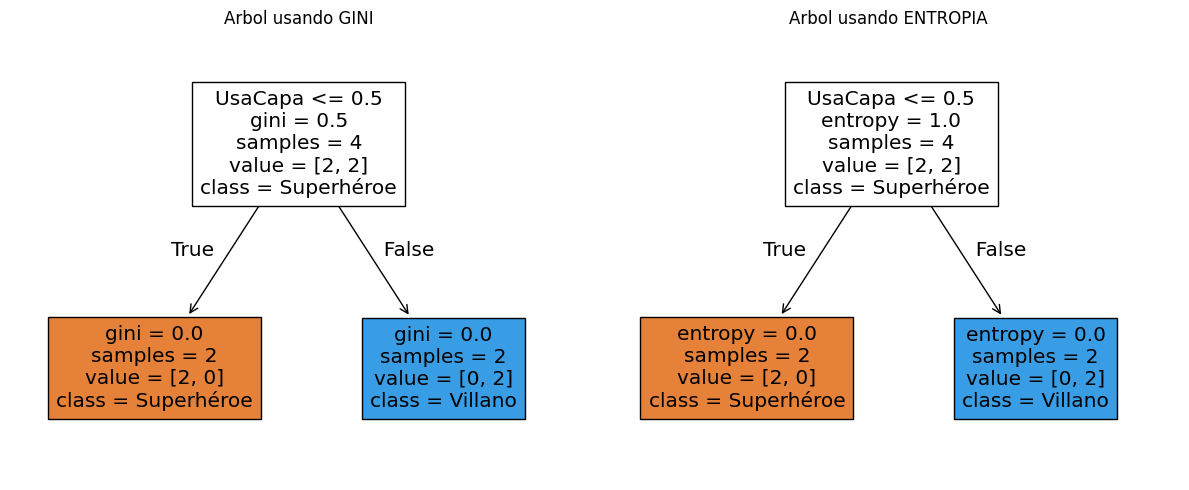

In [5]:
#Mostrar ambos árboles
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1) #Subplot para el árbol gini
#Subplot es una funcion de matplotlib que permite crear multiples graficos en una sola figura 
# plt.subplot(n_rows, n_columns, plot_index)
plot_tree(arbol_gini, feature_names=X.columns, class_names=['Superhéroe', 'Villano'], filled=True)

plt.title("Arbol usando GINI")

plt.subplot(1,2,2) #Subplot para el arbol ENTROPIA
plot_tree(arbol_entropia, feature_names=X.columns, class_names=['Superhéroe', 'Villano'], filled=True)

plt.title("Arbol usando ENTROPIA ")

plt.tight_layout()
plt.show()

In [6]:
#Añadir wonderwoman
wonder_woman = pd.DataFrame({
    "UsaCapa": [0],
    "TienePoderes": [0],
    "Inteligencia": [0]
})

prediccion_gini = arbol_gini.predict(wonder_woman)
prediccion_entropia = arbol_entropia.predict(wonder_woman)

print(f"Predicción con Gini: {'Superhéroe' if prediccion_gini[0] == 0 else 'Villano'}")
print(f"Predicción con Entropía: {'Superhéroe' if prediccion_entropia[0] == 0 else 'Villano'}")


Predicción con Gini: Superhéroe
Predicción con Entropía: Superhéroe


#### Mejor atributo para la raiz

In [7]:
import numpy as np

#feature_importances_ es un atributo del modelo DecisionTreeClassifier que nos dice cuánto contribuye cada característica 
# a las decisiones del árbol. Este devuelve un array numérico con la importancia de cada característica en el modelo.
importancias = arbol_gini.feature_importances_

# Mostrar los valores con sus nombres
for nombre, importancia in zip(X.columns, importancias):
    print(f"{nombre}: {importancia:.4f}")


UsaCapa: 1.0000
TienePoderes: 0.0000
Inteligencia: 0.0000


# ¿Debo llevar paraguas? 
### Problema: Predice si debes llevar paraguas usando ID3. 
#### Preguntas: Muestra la ganancia de información para cada atributo, ¿Qué atributo es más determinante?

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data2 = {
    "Dia":['Lunes','Martes','Miercoles'],
    "Nublado": ['si','no','si'],
    "Humedad":['alta','alta','normal'],
    "Viento":['no','si','no'],
    "LlevarParaguas":['si','si','no',]
}
df2=pd.DataFrame(data2)
df2.head()

,Dia,Nublado,Humedad,Viento,LlevarParaguas
0,Lunes,si,alta,no,si
1,Martes,no,alta,si,si
2,Miercoles,si,normal,no,no


In [9]:
le=LabelEncoder()
for col in ['Nublado', 'Humedad', 'Viento', 'LlevarParaguas']:
    df2[col] = le.fit_transform(df2[col])
df2

,Dia,Nublado,Humedad,Viento,LlevarParaguas
0,Lunes,1,0,0,1
1,Martes,0,0,1,1
2,Miercoles,1,1,0,0


In [10]:
X2 = df2.drop(["Dia","LlevarParaguas"], axis=1)
y2 = df2["LlevarParaguas"]

In [11]:
arbolE2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
arbolE2.fit(X2,y2)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

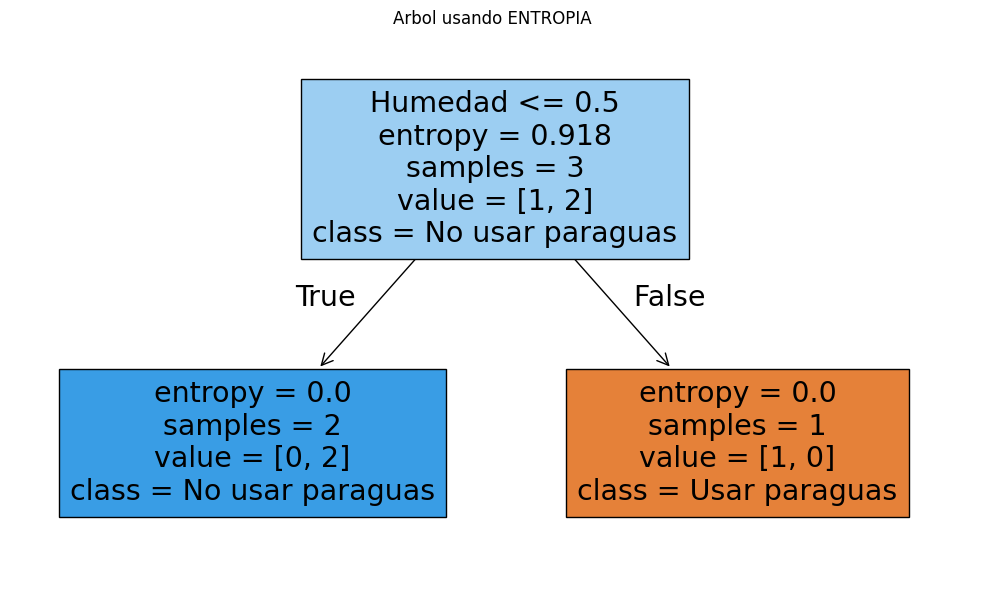

In [12]:
#Mostrar arbol
plt.figure(figsize=(10,6))

plot_tree(arbolE2, feature_names=X2.columns, class_names=['Usar paraguas', 'No usar paraguas'], filled=True)

plt.title("Arbol usando ENTROPIA ")

plt.tight_layout()
plt.show()

#### Atributo mas relevante

In [13]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calcular la ganancia de información de cada atributo
info_gain = mutual_info_classif(X2, y2, discrete_features=True)

# Mostrar resultados
for col, ig in zip(X2.columns, info_gain):
    print(f'Ganancia de información de {col}: {ig:.4f}')

# Determinar el atributo más relevante
atributoRe = X2.columns[np.argmax(info_gain)]
print(f'El atributo más determinante es: {atributoRe}')


Ganancia de información de Nublado: 0.1744
Ganancia de información de Humedad: 0.6365
Ganancia de información de Viento: 0.1744
El atributo más determinante es: Humedad


## 3. ¿Aprobaré el examen? 
#### Problema: Clasifica si un estudiante aprobará usando CART. 
#### Preguntas: ¿Cuál es el Gini inicial? ,Dibuja el árbol hasta el segundo nivel.

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data3 = {
    "Estudiante":['Ana','Luis','Carlos'],
    "Estudio": ['si','no','si'],
    "Dormido":['si','no','no'],
    "Cafe":['no','si','si'],
    "Aprobo":['si','no','si',]
}
df3=pd.DataFrame(data3)
df3.head()

,Estudiante,Estudio,Dormido,Cafe,Aprobo
0,Ana,si,si,no,si
1,Luis,no,no,si,no
2,Carlos,si,no,si,si


In [15]:
le3 = LabelEncoder()
df3 = df3.copy()
for column in ["Estudio",'Dormido','Cafe','Aprobo']:
    df3[column]=le3.fit_transform(df3[column])
df3

,Estudiante,Estudio,Dormido,Cafe,Aprobo
0,Ana,1,1,0,1
1,Luis,0,0,1,0
2,Carlos,1,0,1,1


#### Gini inicial

In [16]:
p_si = df3["Aprobo"].value_counts(normalize=True)[1]
p_no = df3["Aprobo"].value_counts(normalize=True)[0]
gini_inicial = 1 - (p_si**2 + p_no**2)
print(f"Indice Gini inicial: {gini_inicial:.4f}")


Indice Gini inicial: 0.4444


#### Arbol segundo nivel

In [17]:
# Definir variables predictoras y objetivo
X3 = df3.drop(["Estudiante", "Aprobo"], axis=1)
y3 = df3["Aprobo"]

# Entrenar el árbol con criterio Gini (CART)
arbolC = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
arbolC.fit(X3, y3)


DecisionTreeClassifier(max_depth=2, random_state=0)

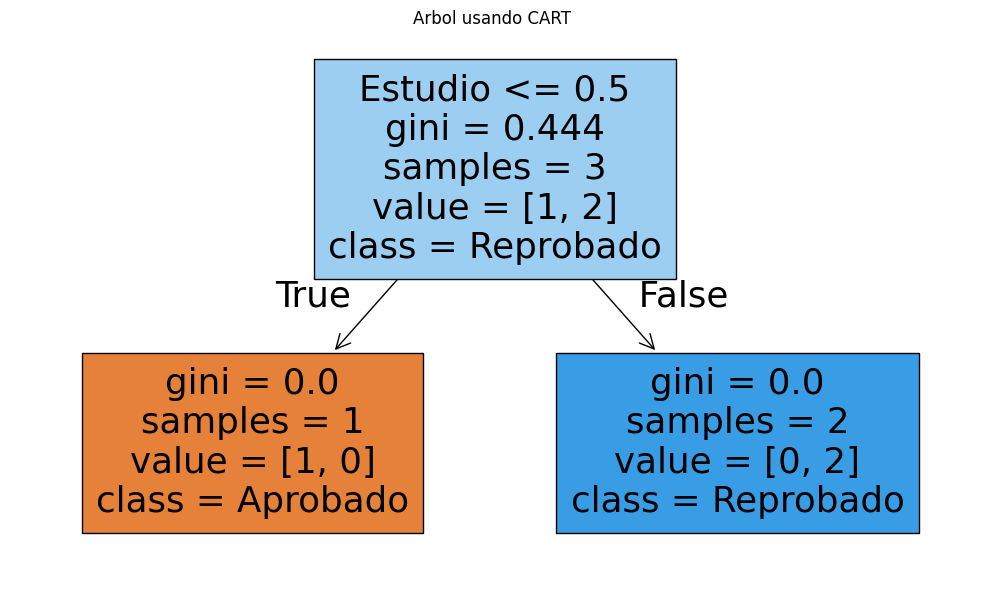

In [18]:
#Mostrar árbol
plt.figure(figsize=(10,6))

plot_tree(arbolC, feature_names=X3.columns, class_names=['Aprobado', 'Reprobado'], filled=True)

plt.title("Arbol usando CART ")

plt.tight_layout()
plt.show()

# 4¿Es un perro peligroso? 
#### Problema: Predice si un perro es peligroso con ID3 
#### Preguntas: ¿Cual es la entropia del nodo raiz?

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data4 = {
    "Raza":['Chihuahua','Pitbull','Labrador'],
    "Tamaño": ['pequeño','grande','grande'],
    "LadraMucho":['si','no','si'],
    "Peludo":['si','no','si'],
    "Peligroso":['no','si','no',]
}
df4=pd.DataFrame(data4)
df4.head()

,Raza,Tamaño,LadraMucho,Peludo,Peligroso
0,Chihuahua,pequeño,si,si,no
1,Pitbull,grande,no,no,si
2,Labrador,grande,si,si,no


In [20]:
le4 = LabelEncoder()
df4 = df4.copy()
for column in ["Tamaño","LadraMucho","Peludo","Peligroso"]:
    df4[column]=le4.fit_transform(df4[column])
df4

,Raza,Tamaño,LadraMucho,Peludo,Peligroso
0,Chihuahua,1,1,1,0
1,Pitbull,0,0,0,1
2,Labrador,0,1,1,0


# Me gustara la pelicula?
#### problema: Clasifica si te gustara una pelicula usando CART
#### Preguntas: ¿Que atributo tiene mayor importancia? ¿Como se divide el nodo para "Genero = Animacion"?

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data5 = {
    "Pelicula":['Inception','Titanic','Shreck'],
    "Genero": ['Ciencia','Romance','Animacion'],
    "DirectorFamoso":['si','si','no'],
    "Duracion>2h":['si','si','no'],
    "MeGusto":['si','no','si',]
}
df5=pd.DataFrame(data5)
df5.head()

,Pelicula,Genero,DirectorFamoso,Duracion>2h,MeGusto
0,Inception,Ciencia,si,si,si
1,Titanic,Romance,si,si,no
2,Shreck,Animacion,no,no,si


In [22]:
le5 = LabelEncoder()
df5 = df5.copy()
for column in ["Genero","DirectorFamoso","Duracion>2h","MeGusto"]:
    df5[column]=le5.fit_transform(df5[column])
df5

,Pelicula,Genero,DirectorFamoso,Duracion>2h,MeGusto
0,Inception,1,1,1,1
1,Titanic,2,1,1,0
2,Shreck,0,0,0,1


In [23]:
# Definir variables predictoras y objetivo
X5 = df5.drop(["Pelicula", "MeGusto"], axis=1)
y5 = df5["MeGusto"]

# Entrenar el árbol con criterio Gini (CART)
arbolC5 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
arbolC5.fit(X5, y5)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [24]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calcular la ganancia de información de cada atributo
info5 = mutual_info_classif(X5, y5, discrete_features=True)

# Mostrar resultados
for col, ig in zip(X5.columns, info5):
    print(f'Ganancia de información de {col}: {ig:.4f}')

# Determinar el atributo más importante
atributoImp = X5.columns[np.argmax(info5)]
print(f'El atributo más importante es: {atributoImp}')

Ganancia de información de Genero: 0.6365
Ganancia de información de DirectorFamoso: 0.1744
Ganancia de información de Duracion>2h: 0.1744
El atributo más importante es: Genero


   Genero
0       1
1       2
2       0


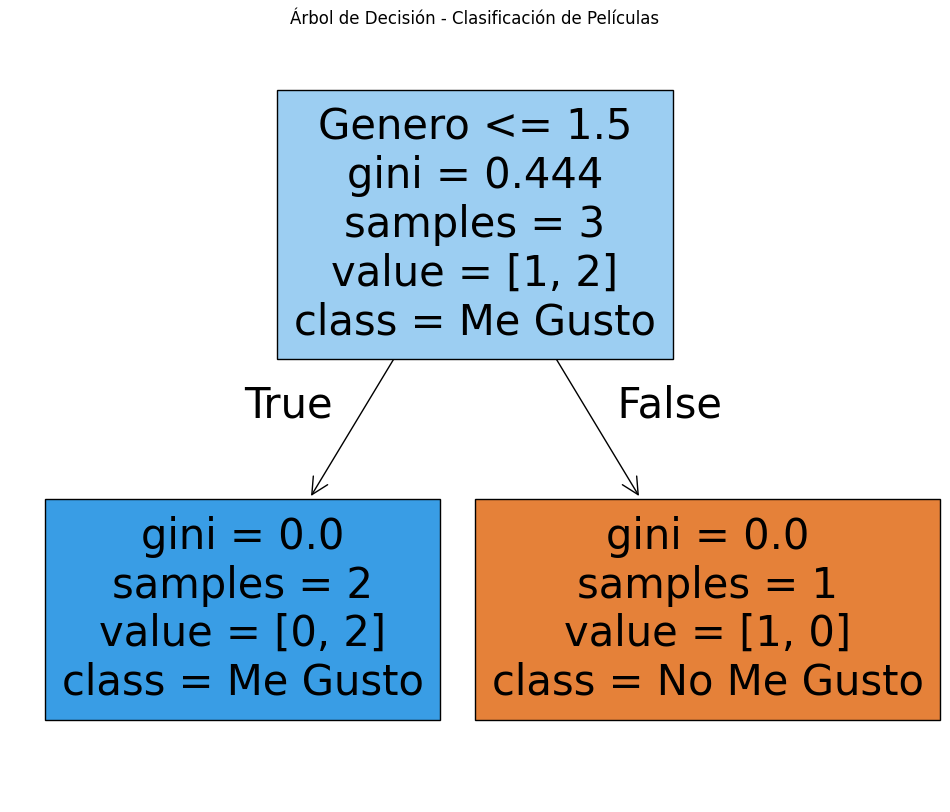

 Predicción para "Género = Animación": Me Gusto


c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
print(df5[["Genero"]])
plt.figure(figsize=(12,10))
plot_tree(arbolC5, feature_names=X5.columns, class_names=['No Me Gusto', 'Me Gusto'], filled=True)
plt.title("Árbol de Decisión - Clasificación de Películas")
plt.show()
# Buscar el número que representa 'Animacion'
valor_animacion = df5.loc[df5["Pelicula"] == "Shreck", "Genero"].values[0]

# Crear ejemplo con el valor correcto
ejemplo5 = [[valor_animacion, 0, 0]]

# Hacer la predicción
prediccion = arbolC5.predict(ejemplo5)
print(f' Predicción para "Género = Animación": {"Me Gusto" if prediccion[0] == 1 else "No Me Gusto"}')


# 6 ¿Es un buen dia para surfear? 
### Problema: Predice si es buen dia para surfear con ID3
### Preguntas: Calcula la ganancia de informacion para "OlasAltas" 
### ¿Por qué "VientoFuerte" podría ser importante?

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data6 = {
    "Dia":['1','2','3'],
    "OlasAltas": ['si','no','si'],
    "VientoFuerte":['no','si','si'],
    "Temperatura":['Alta','Baja','Alta'],
    "Surfear":['si','no','no',]
}
df6=pd.DataFrame(data6)
df6.head()

,Dia,OlasAltas,VientoFuerte,Temperatura,Surfear
0,1,si,no,Alta,si
1,2,no,si,Baja,no
2,3,si,si,Alta,no


In [27]:
le6 = LabelEncoder()

df6 = df6.copy()
# Codificar columnas categóricas
for column in ["OlasAltas", "VientoFuerte", "Temperatura", "Surfear"]:
    df6[column] = le6.fit_transform(df6[column])
df6


,Dia,OlasAltas,VientoFuerte,Temperatura,Surfear
0,1,1,0,0,1
1,2,0,1,1,0
2,3,1,1,0,0


In [28]:
# Definir variables predictoras y objetivo
X6 = df6.drop(["Dia", "Surfear"], axis=1)
y6 = df6["Surfear"]

# Entrenar el árbol con criterio ID3 Entropy
arbolE6 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
arbolE6.fit(X6, y6)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [29]:
from sklearn.feature_selection import mutual_info_classif

# Definir variables predictoras y objetivo
X6 = df6.drop(["Dia", "Surfear"], axis=1)
y6 = df6["Surfear"]

# Calcular la ganancia de información
info6 = mutual_info_classif(X6, y6, discrete_features=True)

# Mostrar el resultado de "OlasAltas"
print(f'Ganancia de Información para "OlasAltas": {info6[list(X6.columns).index("OlasAltas")]:.4f}')


Ganancia de Información para "OlasAltas": 0.1744


#### ¿Por qué "VientoFuerte" podría ser importante?

In [30]:
print(f'Ganancia de Información para "VientoFuerte": {info6[list(X6.columns).index("VientoFuerte")]:.4f}')


Ganancia de Información para "VientoFuerte": 0.6365


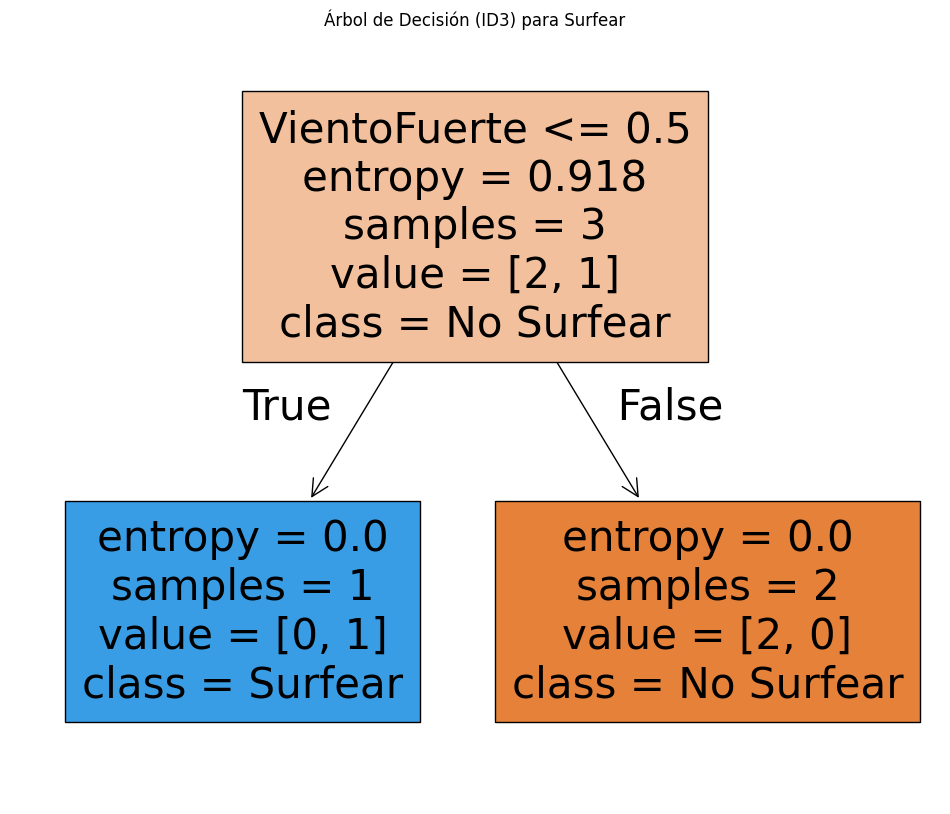

In [31]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12,10)) 
plot_tree(arbolE6, feature_names=X6.columns, class_names=['No Surfear', 'Surfear'], filled=True)
plt.title("Árbol de Decisión (ID3) para Surfear")
plt.show()


# 7 ¿Ganara el partido? 
### Problema: Clasifica si tu equipo ganará usando CART
### Preguntas: ¿Cuál es el GINI para "Local=Si"? 
### "RivalFuerte = Si", ¿qué predice el árbol?

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data7 = {
    "Partido":['1','2','3'],
    "Local": ['si','no','si'],
    "RivalFuerte":['no','si','si'],
    "JugadorEstrella":['si','no','si'],
    "Gano":['si','no','si',]
}
df7=pd.DataFrame(data7)
df7.head()

,Partido,Local,RivalFuerte,JugadorEstrella,Gano
0,1,si,no,si,si
1,2,no,si,no,no
2,3,si,si,si,si


In [33]:
le7 = LabelEncoder()
df7 = df7.copy()
for column in ["Gano","Local","RivalFuerte","JugadorEstrella"]:
    df7[column]=le7.fit_transform(df7[column])
df7

,Partido,Local,RivalFuerte,JugadorEstrella,Gano
0,1,1,0,1,1
1,2,0,1,0,0
2,3,1,1,1,1


In [34]:
# Calcular las proporciones
p_sig = df7["Gano"].value_counts(normalize=True)[1]
p_nog = df7["Gano"].value_counts(normalize=True)[0]

# Índice Gini
gini_local_si = 1 - (p_sig**2 + p_nog**2)
print(f"Indice Gini para 'Local = Sí': {gini_local_si:.4f}")


Indice Gini para 'Local = Sí': 0.4444


In [35]:
# Definir variables predictoras y objetivo
X7 = df7.drop(["Partido", "Gano"], axis=1)
y7 = df7["Gano"]

# Entrenar el árbol con criterio Gini (CART)
arbolC7 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
arbolC7.fit(X7, y7)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [36]:
# Crear el ejemplo con nombres de columna
ejemplo_df = pd.DataFrame([[1, 1, 1]], columns=X7.columns)

# Predicción con nombres de características
prediccion = arbolC7.predict(ejemplo_df)
print(f" Predicción del árbol cuando 'RivalFuerte = Sí': {'Ganará' if prediccion[0] == 1 else 'No ganará'}")



 Predicción del árbol cuando 'RivalFuerte = Sí': Ganará


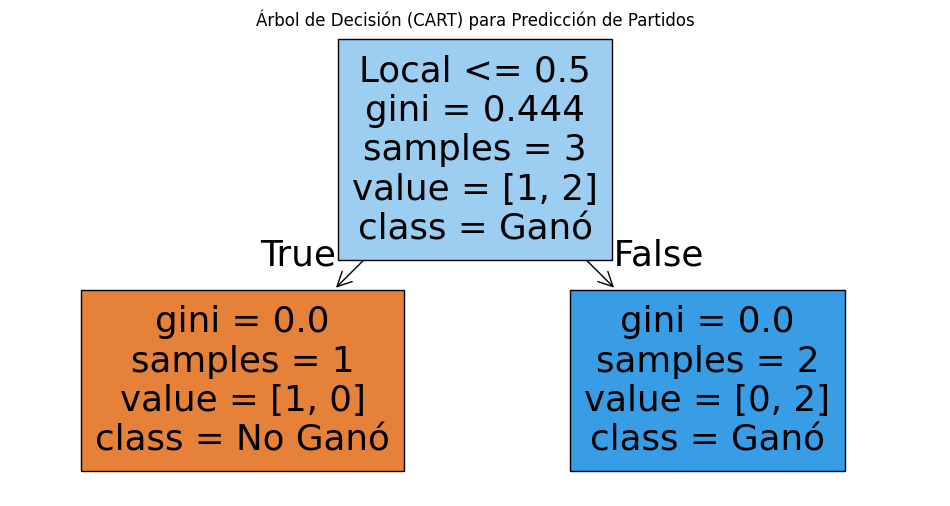

In [37]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12,6)) 
plot_tree(arbolC7, feature_names=X7.columns, class_names=['No Ganó', 'Ganó'], filled=True)
plt.title("Árbol de Decisión (CART) para Predicción de Partidos")
plt.show()


# 8 Es un buen candidato para un trabajo?
#### Problema: Predice si un candidato será contratado con ID3
#### Preguntas: Calcula la ganancia de informacion para "Experiencia" ¿Qué atributo es redundante?

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

data8 = {
    "Candidato":['A','B','C'],
    "Experiencia": ['si','no','si'],
    "Titulado":['no','si','si'],
    "HabilidadesBlandas":['si','no','si'],
    "Contratado":['si','no','si',]
}
df8=pd.DataFrame(data8)
df8.head()

,Candidato,Experiencia,Titulado,HabilidadesBlandas,Contratado
0,A,si,no,si,si
1,B,no,si,no,no
2,C,si,si,si,si


In [39]:
le8 = LabelEncoder()
df8 = df8.copy()
for column in ["Candidato","Experiencia","Titulado","HabilidadesBlandas","Contratado"]:
    df8[column]=le8.fit_transform(df8[column])
df8

,Candidato,Experiencia,Titulado,HabilidadesBlandas,Contratado
0,0,1,0,1,1
1,1,0,1,0,0
2,2,1,1,1,1


In [40]:
# Definir variables predictoras y objetivo
X8 = df8.drop(["Candidato", "Contratado"], axis=1)
y8 = df8["Contratado"]

# Entrenar el árbol con criterio ID3 entropy
arbolE8 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
arbolE8.fit(X8, y8)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [41]:
# Calcular la ganancia de información
info8 = mutual_info_classif(X8, y8, discrete_features=True)

# Mostrar el resultado de "Experiencia"
print(f'Ganancia de Información para "Experiencia": {info8[list(X8.columns).index("Experiencia")]:.4f}')

Ganancia de Información para "Experiencia": 0.6365


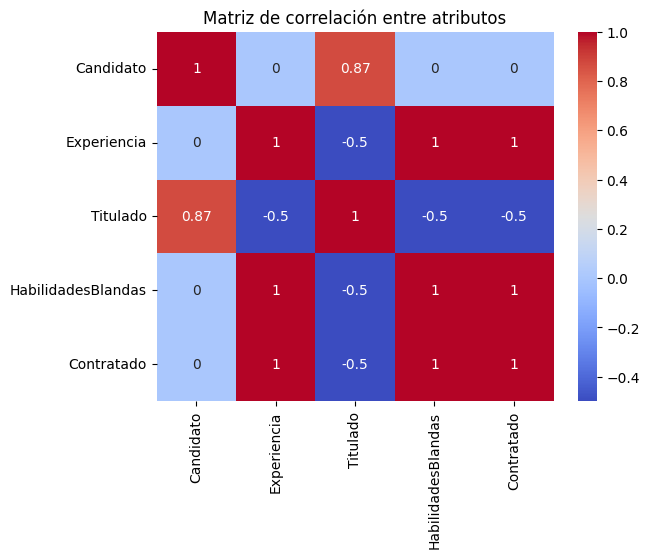

In [42]:
import seaborn as sns

# Matriz de correlación
corr_matrix = df8.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre atributos")
plt.show()


In [43]:
# El atributo Habilidades Blandas es redundante, ya que tiene una correlación de 1.0 con Experiencia y Contratado. 
# Esto significa que aporta exactamente la misma información que Experiencia, por lo que incluirlo en el modelo no agregaría
# valor adicional.

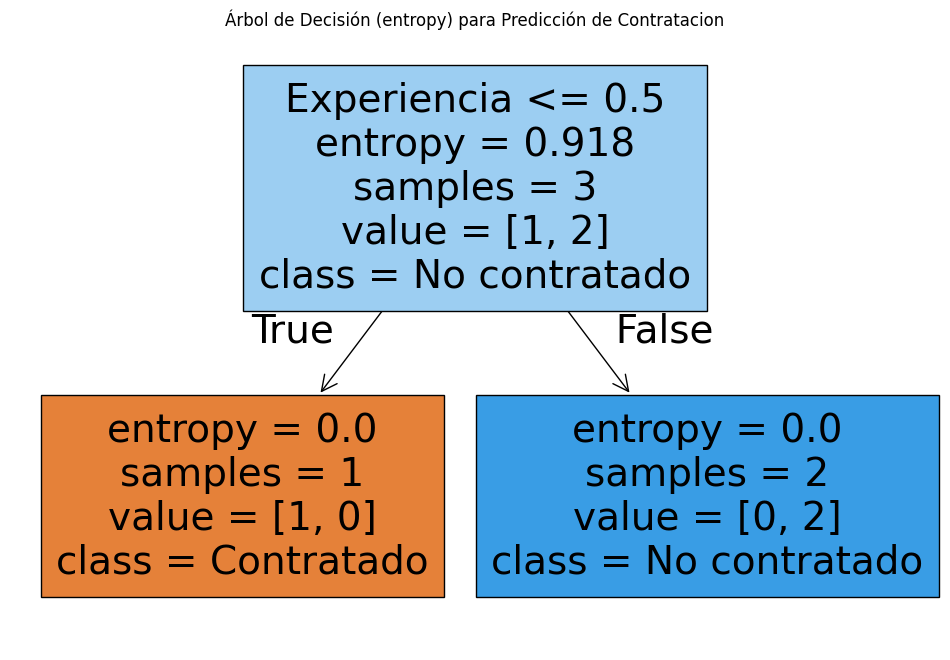

In [44]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12,8))  
plot_tree(arbolE8, feature_names=X8.columns, class_names=['Contratado', 'No contratado'], filled=True)
plt.title("Árbol de Decisión (entropy) para Predicción de Contratacion")
plt.show()